In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from termcolor import colored
import pickle

In [2]:
data = pd.read_csv('../data.csv')

In [3]:
Y = data['class']
X = data.drop('class', axis=1)
feature_names = X.columns

In [4]:
Y.replace("g", 0, inplace=True)
Y.replace("h", 1, inplace=True)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

In [6]:
with open('DTC.pkl', 'rb') as file:
    DTC = pickle.load(file)

In [7]:
with open('RFC.pkl', 'rb') as file:
    RFC = pickle.load(file)

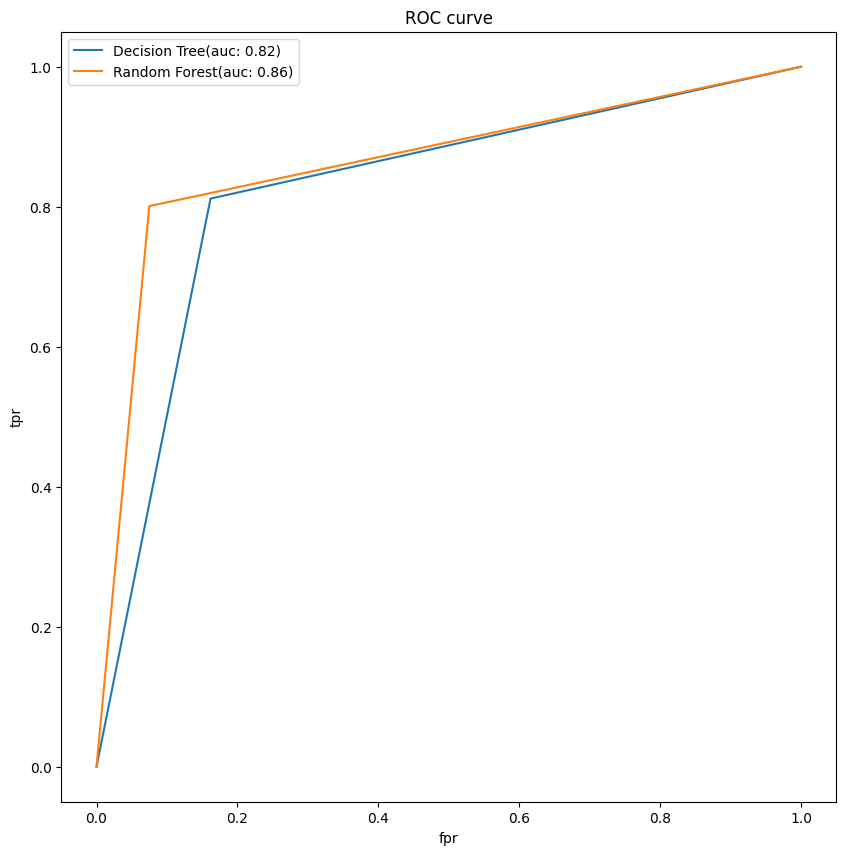

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [DTC, RFC]
model_names = ['Decision Tree', 'Random Forest']

plt.figure(figsize=(10, 10))

for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title("ROC curve")
plt.legend()
plt.show()